# Portfolio Optimization 
## Employing the Efficient Frontier and Risk-Parity Methods

This simulation will provide an optimized blend of specified securities by applying the principles of Markowitz Portfolio Optimization and Ray Dalio's Risk-Parity Principle by using the historical returns and variance. 

Financial data is pulled and parsed using **python datareader** from **yahoo finance**.

Begin by inputing the name of all securities within the portfolio (second box):

#### Built With
 * Python 3
 * MatPlotLib

###### Written by: Jake Robinson (https://github.com/jakerobinson19)

In [25]:
#import relevant modules and packages
import numpy as np
import pandas as pd
from datetime import datetime
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
#input the tickers of all securities in portfolio
assets = ['FB', 'AAPL','AMZN','NFLX','GOOG']
percentages = [.2, .2, .2, .2, .2]

start_date = '2005-6-8'

In [98]:
# Example of the historical stock data extracted from yahoo finance
d = wb.DataReader(assets[1], 'yahoo', start='2008-01-01')
d.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-04,325.619995,320.779999,324.390015,322.320007,21890100.0,322.320007
2020-06-05,331.750000,323.230011,323.350006,331.500000,34312600.0,331.500000
2020-06-08,333.600006,327.320007,330.250000,333.459991,23913600.0,333.459991
2020-06-09,345.609985,332.010010,332.140015,343.989990,36884300.0,343.989990
2020-06-10,354.769989,346.089996,347.899994,354.059998,35312689.0,354.059998


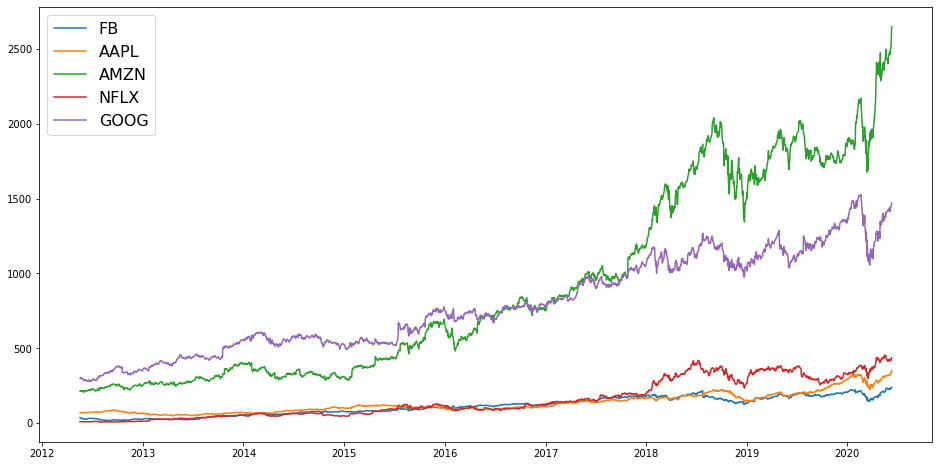

In [28]:
num_assets = len(assets)
percentages = np.array(percentages)

data = pd.DataFrame()

# Grab the historical Adj Close data for each stock from yahoo
for i in assets:
        data[i] = wb.DataReader(i, data_source='yahoo', start=start_date)['Adj Close']

# Plot the overlapping stock charts
plt.figure(figsize=(16,8))   

for i in assets:
    plt.plot(returns.index, data[i])
 
plt.legend(data.columns, fontsize=16)
plt.show()

In [29]:
# Calculate daily returns for each asset in the portfolio
returns = np.log(data/data.shift(1))
returns.tail()

,FB,AAPL,AMZN,NFLX,GOOG
Date,,,,,
2020-06-04,-0.016957,-0.008649,-0.007208,-0.018271,-0.016991
2020-06-05,0.019604,0.028083,0.009062,0.012639,0.018390
2020-06-08,0.002726,0.005895,0.016401,-0.000262,0.005698
2020-06-09,0.030934,0.031090,0.029973,0.034120,0.006580
2020-06-10,0.001140,0.027837,0.017864,0.006979,0.008963


In [100]:
print("Total returns for each security (assuming they were bought on the start date of {})\n".format(data.index[0].strftime("%Y-%m-%d")))

dollars = 1000
dollars_in_assets = percentages*dollars

for i, stock in enumerate(assets):
    
    tot_return = ((data[stock][-1] - data[stock][0])/data[stock][0])*100
    print("{}: {}%".format(stock, round(tot_return, 2)))
    dollars_in_assets[i] = dollars_in_assets[i]*(tot_return/100)    
    
print("\nIf you had invested $1000 dollars on {} in these assets with the specified portfolio percentages above,\nit would be worth ${} today".format(data.index[0].strftime("%Y-%m-%d"), round(dollars_in_assets.sum(),2)))

Total returns for each security (assuming they were bought on the start date of 2012-05-18)

FB: 525.01%
AAPL: 439.24%
AMZN: 1138.13%
NFLX: 4273.4%
GOOG: 391.26%

If you had invested $1000 dollars on 2012-05-18 in these assets with the specified portfolio percentages above,
it would be worth $13534.09 today


### Expected Portfolio Return:

In [31]:
np.sum(percentages * returns.mean()) * 250

0.2812953197727874

#### Expected Portfolio Variance:

In [32]:
np.dot(percentages.T, np.dot(returns.cov() *250, percentages))

0.05817828562587683

#### Expected Portfolio Volatility:

In [33]:
np.sqrt(np.dot(percentages.T, np.dot(returns.cov() *250, percentages)))

0.24120175294942786

In [34]:
all_weights = np.zeros((10000,len(returns.columns)))
pfolio_returns = []
pfolio_vols = []
sharpe_arr = []

#create array of returns and volatilities for each of the 1000 simulations
for x in range (10000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # Save Weights
    all_weights[x,:] = weights
    
    # Portfolio return and volatility
    pfolio_returns.append(np.sum(weights * returns.mean()) * 250)
    pfolio_vols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() *250, weights))))
    
    # Sharpe Ratio
    sharpe_arr.append(pfolio_returns[x]/pfolio_vols[x])

#convert arrays in numpy arrays
pfolio_returns = np.array(pfolio_returns)
pfolio_vols = np.array(pfolio_vols)

#### Expected Return Corresponding to Max Sharpe Ratio:

In [35]:
max_sr_ret = pfolio_returns[sharpe_arr.index(max(sharpe_arr))]

#### Volatility Corresponding to Max Sharpe Ratio

In [36]:
max_sr_vol = pfolio_vols[sharpe_arr.index(max(sharpe_arr))]

## Efficient Frontier (Markowitz Method)

The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return.

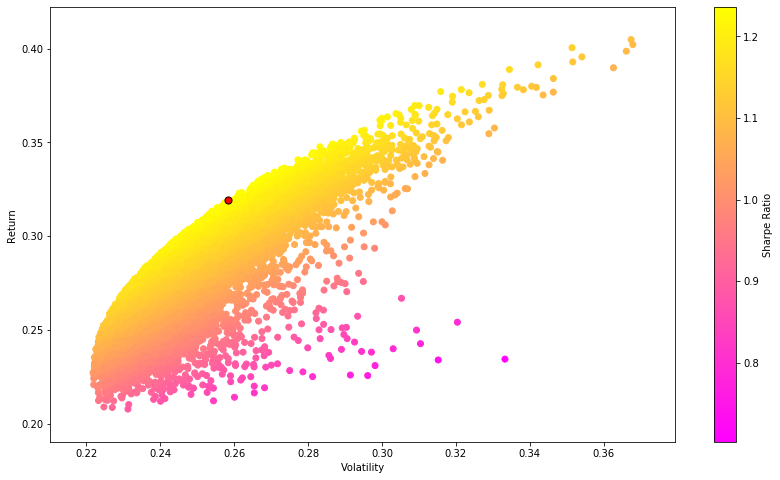

In [37]:
plt.figure(figsize=(14,8))
plt.scatter(pfolio_vols,pfolio_returns,c=sharpe_arr,cmap='spring')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR (optimal risk/reward)
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black',cmap='plasma')

## Risk-Parity Portfolio ( Ray Dalio Method)

Risk parity is a portfolio allocation strategy using risk to determine allocations across various components of an investment portfolio. The risk parity strategy follows the modern portfolio theory (MPT) approach to investing. MPT seeks to diversify an investment portfolio among specified assets to optimize returns while adhering to market risk parameters by viewing the risk and returns for the entire portfolio. 

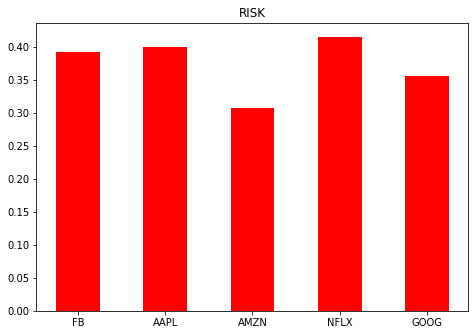

In [86]:
# risks associated with each security
vol = returns.rolling(window=252).std() * np.sqrt(252)
vols = vol.tail(1).values

# Set up figure to visualize the risk of each asset in the portfolio
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(assets, height=vols[0], width=0.5, color='r')
ax.set_title('RISK')
plt.show()

In [90]:
# get the inverse of the individual volatilies
inv_vol = 1/vols

# sum up these inverses
inv_vol.sum()

# calculate the risk parity percentage by dividing the inverse volatility by the sum
rp_weights = inv_vol/inv_vol.sum()
print(rp_weights[0])

[0.18857366 0.18489438 0.2406579  0.1781602  0.20771386]


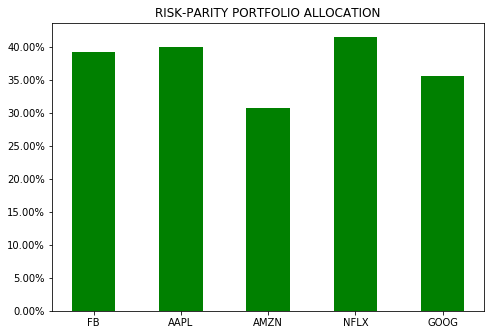

In [89]:
# Set up figure to visualize the risk of each asset in the portfolio
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(assets, height=rp_weights[0], width=0.5, color='g')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set_title('RISK-PARITY PORTFOLIO ALLOCATION')
plt.show()

# Conclusion

Based on 10000 simulations, an optimal blend for this portfolio of assets is below.

In [96]:
optimal_blend = all_weights[sharpe_arr.index(max(sharpe_arr))]*100

print("The inputed portfolio consisting of: \n")

for ind, value in enumerate(percentages*100):
    print("{}% {}".format(round(value, 2), assets[ind]))
    
print("\nProvides an expected return of {}% with volatility of {}%.".format(round(np.sum(percentages * returns.mean()) * 25000, 2),
                                                                      round(np.sqrt(np.dot(percentages.T, np.dot(returns.cov() *250, percentages)))*100,2)))
print("\nMarkowitz Model (Efficient Frontier)\n")
for ind, value in enumerate(optimal_blend):
    print("{}% {}".format(round(value, 2), assets[ind]))
    
print("\nThis optimal blend offers the most efficient option by balancing the expected return and volatility.")
print("The expected return of this portfolio is {}% with a volality of {}%.".format(round(pfolio_returns[sharpe_arr.index(max(sharpe_arr))]*100,2),
                                                                                  round(pfolio_vols[sharpe_arr.index(max(sharpe_arr))]*100),2))
print("These values were chosen by computing the maximum Sharpe Ratio for all simulations. \nThe corresponding ratio value for this blend in {}.".format(round(max(sharpe_arr),3)))

print("\nRisk-Parity Portfolio")
print("\nThe risk-parity method, which seeks to optimize returns while adhering to market risk parameters, indicates the following blend will be the best and most resilient option:\n")

for ind, value in enumerate(percentages*100):
    print("{}% {}".format(round(rp_weights[0][ind]*100, 2), assets[ind]))




The inputed portfolio consisting of: 

20.0% FB
20.0% AAPL
20.0% AMZN
20.0% NFLX
20.0% GOOG

Provides an expected return of 28.13% with volatility of 24.12%.

Markowitz Model (Efficient Frontier)

4.46% FB
23.42% AAPL
41.18% AMZN
26.72% NFLX
4.23% GOOG

This optimal blend offers the most efficient option by balancing the expected return and volatility.
The expected return of this portfolio is 31.93% with a volality of 26.0%.
These values were chosen by computing the maximum Sharpe Ratio for all simulations. 
The corresponding ratio value for this blend in 1.236.

Risk-Parity Portfolio

The risk-parity method, which seeks to optimize returns while adhering to market risk parameters, indicates the following blend will be the best and most resilient option:

18.86% FB
18.49% AAPL
24.07% AMZN
17.82% NFLX
20.77% GOOG
